<a href="https://colab.research.google.com/github/ramonsetup/MVP_PUC-RIO_SPRINT_1/blob/main/teste_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###informações da base 

In [ ]:
#informações da base
#survival:Sobrevivencia (0=nao, 1 = sim)
#Pclass: Classe do bilhete (1=1°, 2=2°, 3=3°)
#Sex= Gênero
#Age= Idade
#Sibsp: N° de irmaos/conjuges a bordo do Titanic
#Parch: N° de pais/filhos a bordo do Titanic
#Ticket: Numero do bilhete
#Fare: Tarifa do passageiro
#Cabin: Numero da cabine
#Embarked: Porto de embarcação (C=Cherbourg, Q=Queenstown, S=Southampton)


###importações

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [2]:
#importando a base do titanic (train)
titanic = pd.read_csv ('train.csv')

###Informações Gerais e Estatisticas Descritivas

In [ ]:
#Mostra as dimensões
titanic.shape

(891, 12)

In [ ]:
#Mostra as informações da base (tipo de coluna, linhas não nulas, etc.)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Mostra as primeiras linhas (quantidade de linhas desejadas)
titanic.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male  25.0      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [ ]:
#Mostra as ultimas linhas (quantidade de linhas desejadas)
titanic.tail(10)

PassengerId  Survived  Pclass                                      Name  \
881          882         0       3                        Markun, Mr. Johann   
882          883         0       3              Dahlberg, Miss. Gerda Ulrika   
883          884         0       2             Banfield, Mr. Frederick James   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
881    male  33.0      0      0            349257   7.8958   NaN        S  
882  female  22.0      0      0              7552  10.5167   NaN        S  
883    male  28.0      0      0  C.A./SOTON 34068  10.5000   NaN        S  
884    male  25.0      0      0   SOTON/OQ 392076   7.0500   NaN        S  
885  female  39.0      0      5            382652  29.1250   NaN        Q  
886    male  27.0      0      0            211536  13.0000   NaN        S  
887  female  19.0      0      0            112053  30.0000   B42        S  
888  female  21.5      1      2        W./C. 6607  23.4500   NaN        S  
889    male  26.0      0      0            111369  30.0000  C148        C  
890    male  32.0      0      0            370376   7.7500   NaN        Q

In [ ]:
#Faz um resumo estatistico (media,desviopadrão,minimo,maximo e os quartis)
titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.112424    0.523008   
std     257.353842    0.486592    0.836071   13.304424    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   21.500000    0.000000   
50%     446.000000    0.000000    3.000000   26.000000    0.000000   
75%     668.500000    1.000000    3.000000   36.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

###tratamento da base

In [9]:
#quantidade de valores unicos em cada coluna
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
#visualizar os valores vazios
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#verificando os registros de embarque que estao vazio
titanic[titanic.Embarked.isnull()]


PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

In [12]:
#atualizando o valor das linhas faltante
#como havia apenas 2 linhas faltando, fiz uma pesquisa pelo nome e encontrei a informação que estava faltando, e em seguida ja foi feita 
#o preenchimento do valor faltante.
#linha 1:https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html
#linha 2:https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html
titanic.loc[titanic.Embarked.isnull(),'Embarked'] = 'S'

In [13]:
#verificando valores nulos na idade, tem muitos valores, fazer uma analise da coluna para entender e optar pela melhor forma de tratar
titanic[titanic.Age.isnull()]

PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
5      male  NaN      0      0      330877   8.4583   NaN        Q  
17     male  NaN      0      0      244373  13.0000   NaN        S  
19   female  NaN      0      0        2649   7.2250   NaN        C  
26     male  NaN      0      0        2631   7.2250   NaN        C  
28   female  NaN      0      0      330959   7.8792   NaN        Q  
..      ...  ...    ...    ...         ...      ...   ...      ...  
859    male  NaN      0      0        2629   7.2292   NaN        C  
863  female  NaN      8      2    CA. 2343  69.5500   NaN        S  
868    male  NaN      0      0      345777   9.5000   NaN        S  
878    male  NaN      0      0      349217   7.8958   NaN        S  
888  female  NaN      1      2  W./C. 6607  23.4500   NaN        S  

[177 rows x 12 columns]

In [14]:
#verificar o describe para idade, aki podemos verificar que também ha crianças
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

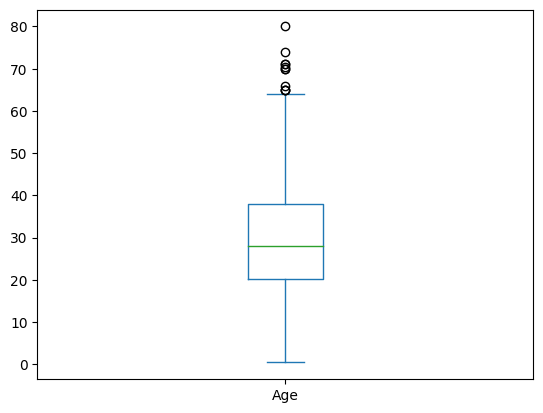

In [15]:
#visualizar idade no boxplot
titanic.Age.plot.box();

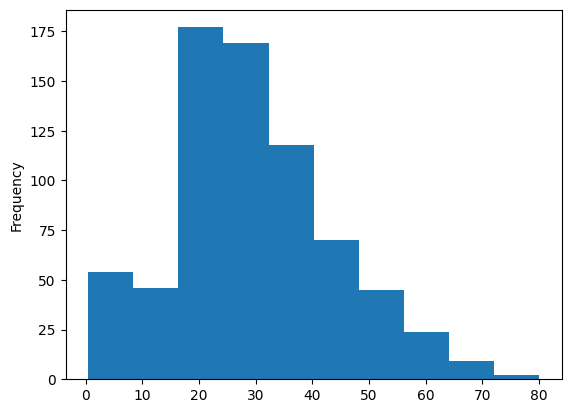

In [16]:
#histograma da idade
titanic.Age.plot.hist();

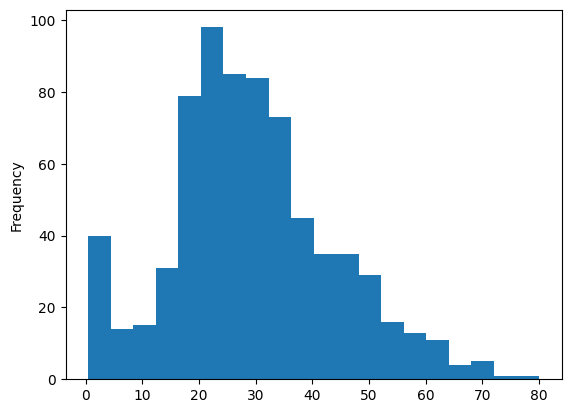

In [17]:
#histograma da idade com 20
titanic.Age.plot.hist(bins=20);

In [18]:
#mediana ou a media nas idades, usar apenas a media para fazer a substituição dos valores faltantes apesar de ser um opção mais simples, 
#ficaria muito grosseira, então ireia lapidar mais um pouco.
titanic.Age.median()

28.0

In [19]:
#tirar a media de idade por grupo como o Pclass
titanic.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [20]:
#adicionar o genero e a classe ao grupo
titanic.groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [21]:
#considerando qual vai ser o Pclass e o Sex, fazer a substituição com base na mediana de acordo com o genero e classe
#criar uma nova coluna das idades com base no resultado
titanic['Age_Check1']=titanic.groupby(['Pclass','Sex'])['Age'].transform('median')

In [22]:
#visualizando a base
titanic.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  Age_Check1  
0      0         A/5 21171   7.2500   NaN        S        25.0  
1      0          PC 17599  71.2833   C85        C        35.0  
2      0  STON/O2. 3101282   7.9250   NaN        S        21.5  
3      0            113803  53.1000  C123        S        35.0  
4      0            373450   8.0500   NaN        S        25.0  
5      0            330877   8.4583   NaN        Q        25.0  
6      0             17463  51.8625   E46        S        40.0  
7      1            349909  21.0750   NaN        S        25.0  
8      2            347742  11.1333   NaN        S        21.5  
9      0            237736  30.0708   NaN        C        28.0

In [23]:
#retornar o 'Age_check1' somente quando 'Age' for igual a vazio em uma nova coluna
titanic['Age_Check2']=titanic.Age.fillna(titanic.groupby(['Pclass','Sex'])['Age'].transform('median'))

In [24]:
#visualizando a base novamente
titanic[titanic.Age.isnull()].head(10)

PassengerId  Survived  Pclass  \
5             6         0       3   
17           18         1       2   
19           20         1       3   
26           27         0       3   
28           29         1       3   
29           30         0       3   
31           32         1       1   
32           33         1       3   
36           37         1       3   
42           43         0       3   

                                              Name     Sex  Age  SibSp  Parch  \
5                                 Moran, Mr. James    male  NaN      0      0   
17                    Williams, Mr. Charles Eugene    male  NaN      0      0   
19                         Masselmani, Mrs. Fatima  female  NaN      0      0   
26                         Emir, Mr. Farred Chehab    male  NaN      0      0   
28                   O'Dwyer, Miss. Ellen "Nellie"  female  NaN      0      0   
29                             Todoroff, Mr. Lalio    male  NaN      0      0   
31  Spencer, Mrs. William Augustus (Marie Eugenie)  female  NaN      1      0   
32                        Glynn, Miss. Mary Agatha  female  NaN      0      0   
36                                Mamee, Mr. Hanna    male  NaN      0      0   
42                             Kraeff, Mr. Theodor    male  NaN      0      0   

      Ticket      Fare Cabin Embarked  Age_Check1  Age_Check2  
5     330877    8.4583   NaN        Q        25.0        25.0  
17    244373   13.0000   NaN        S        30.0        30.0  
19      2649    7.2250   NaN        C        21.5        21.5  
26      2631    7.2250   NaN        C        25.0        25.0  
28    330959    7.8792   NaN        Q        21.5        21.5  
29    349216    7.8958   NaN        S        25.0        25.0  
31  PC 17569  146.5208   B78        C        35.0        35.0  
32    335677    7.7500   NaN        Q        21.5        21.5  
36      2677    7.2292   NaN        C        25.0        25.0  
42    349253    7.8958   NaN        C        25.0        25.0

In [25]:
#diretamente utilizar esse valor no fillna
titanic['Age']=titanic.Age.fillna(titanic.groupby(['Pclass','Sex'])['Age'].transform('median'))

In [27]:
#apagar as duas colunas adicionadas
titanic = titanic.drop(['Age_Check1','Age_Check2'],axis=1)

In [28]:
#verificar novamente os valores nulos
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [29]:
#verificando as informações em cabine
titanic.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [30]:
#a coluna cabine nao sera util no momento,pois é uma informação nao segue um padrao nem se associa a nenhuma outra
#portanto sera excluida.
titanic = titanic.drop('Cabin',axis=1)

verificando a existencia de outliers

In [31]:
titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.112424    0.523008   
std     257.353842    0.486592    0.836071   13.304424    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   21.500000    0.000000   
50%     446.000000    0.000000    3.000000   26.000000    0.000000   
75%     668.500000    1.000000    3.000000   36.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

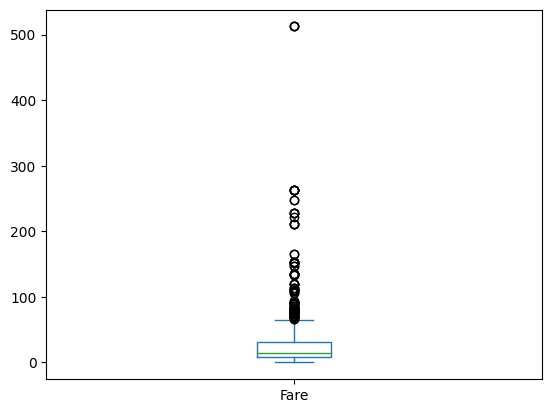

In [32]:
#visualisando o boxplot da taxa
titanic.Fare.plot.box();

In [36]:
#cardinalidade
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [38]:
#visualisazao das informalçoes... base limpa e pronta para a analise.
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


###analise exploratoria

EM SEGUIDA FAREMOS A UTILIZAÇAO DE ALGUNS GRAFICOS PARA OBTER ALGUMAS INFORMAÇÕES PARA ANALISAR

In [ ]:
#Correlação de Pearson
titanic.corr(method='pearson')

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

Visualizações Unimodais

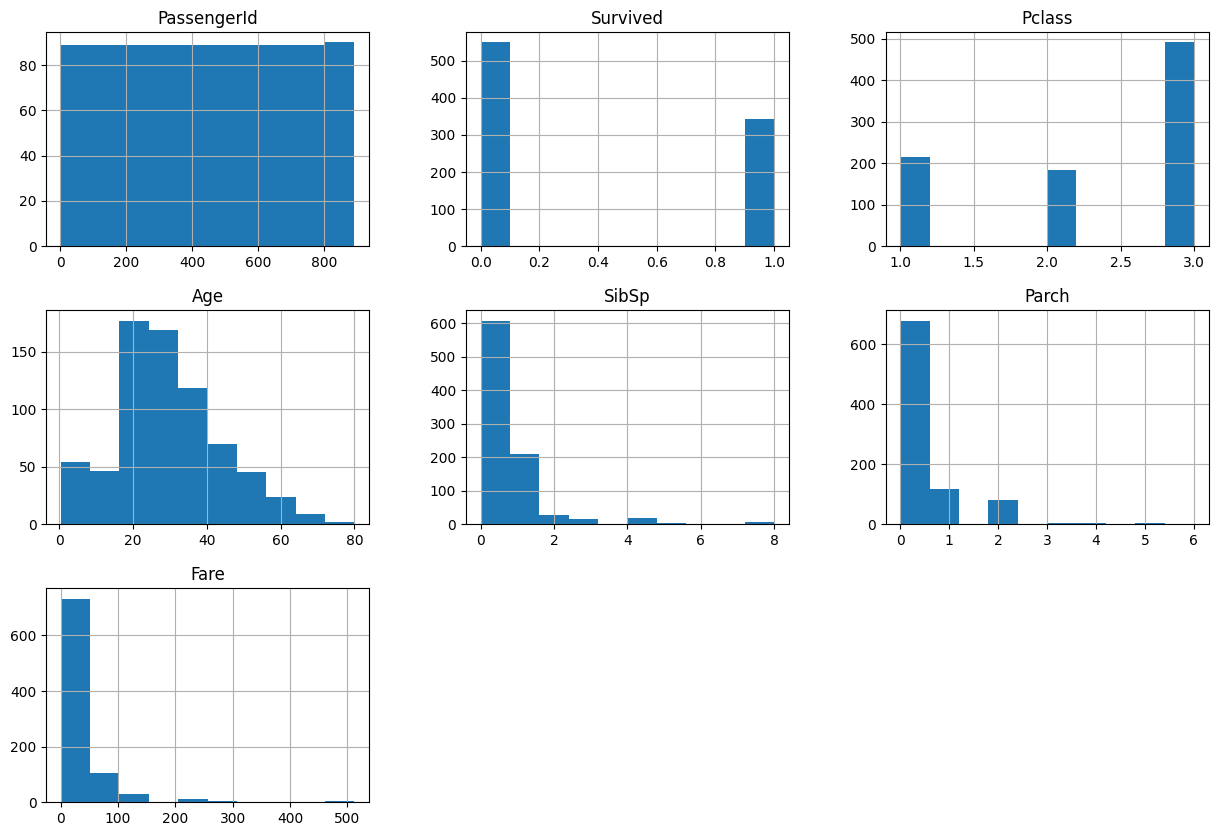

In [ ]:
#histograma
titanic.hist(figsize = (15,10))
plt.show()

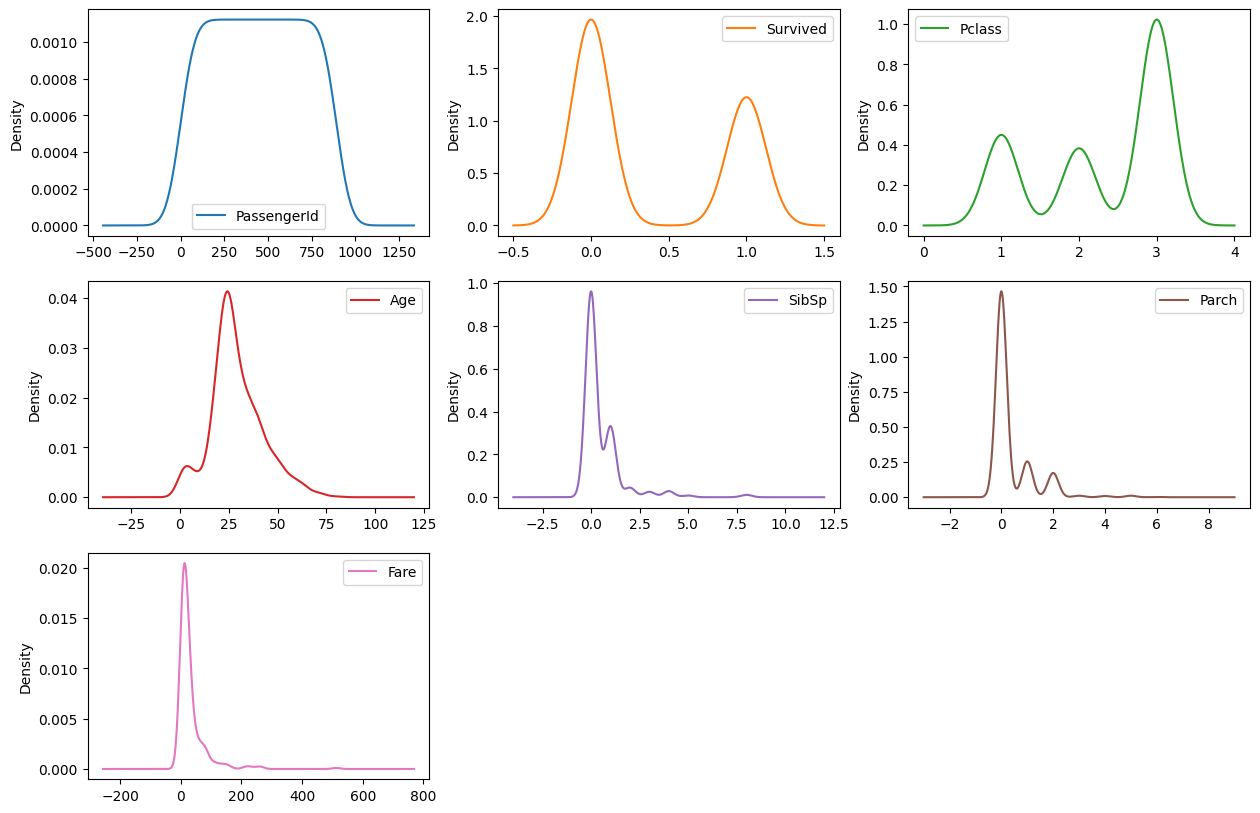

In [ ]:
#Density Plot
titanic.plot(kind = 'density',subplots = True,layout = (3,3), sharex = False,figsize = (15,10))
plt.show()

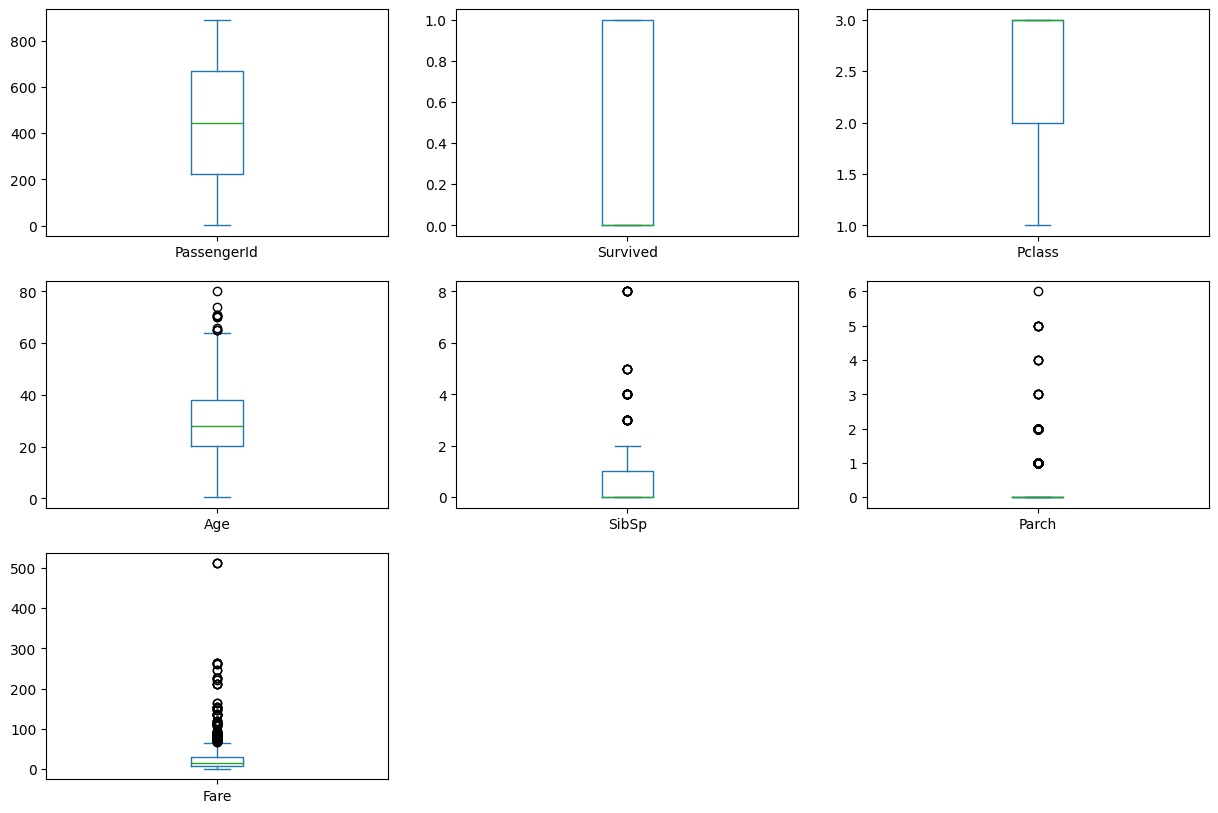

In [ ]:
#bloxpot
titanic.plot(kind = 'box' , subplots = True, layout = (3,3),sharex = False , sharey = False, figsize = (15,10))
plt.show()

Visualiações Multimodais

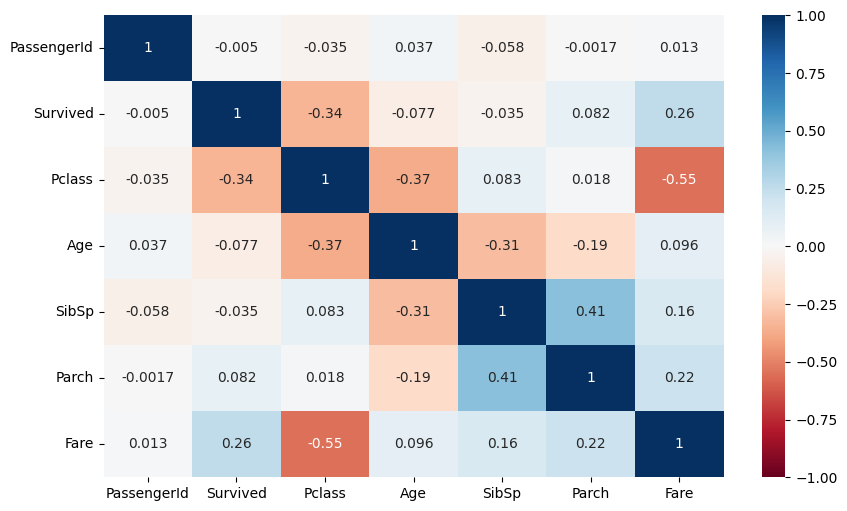

In [ ]:
#Matriz de corelação com Saeborn
plt.figure(figsize = (10,6))
sns.heatmap(titanic.corr(), annot=True, cmap="RdBu", vmin=-1, vmax=1);

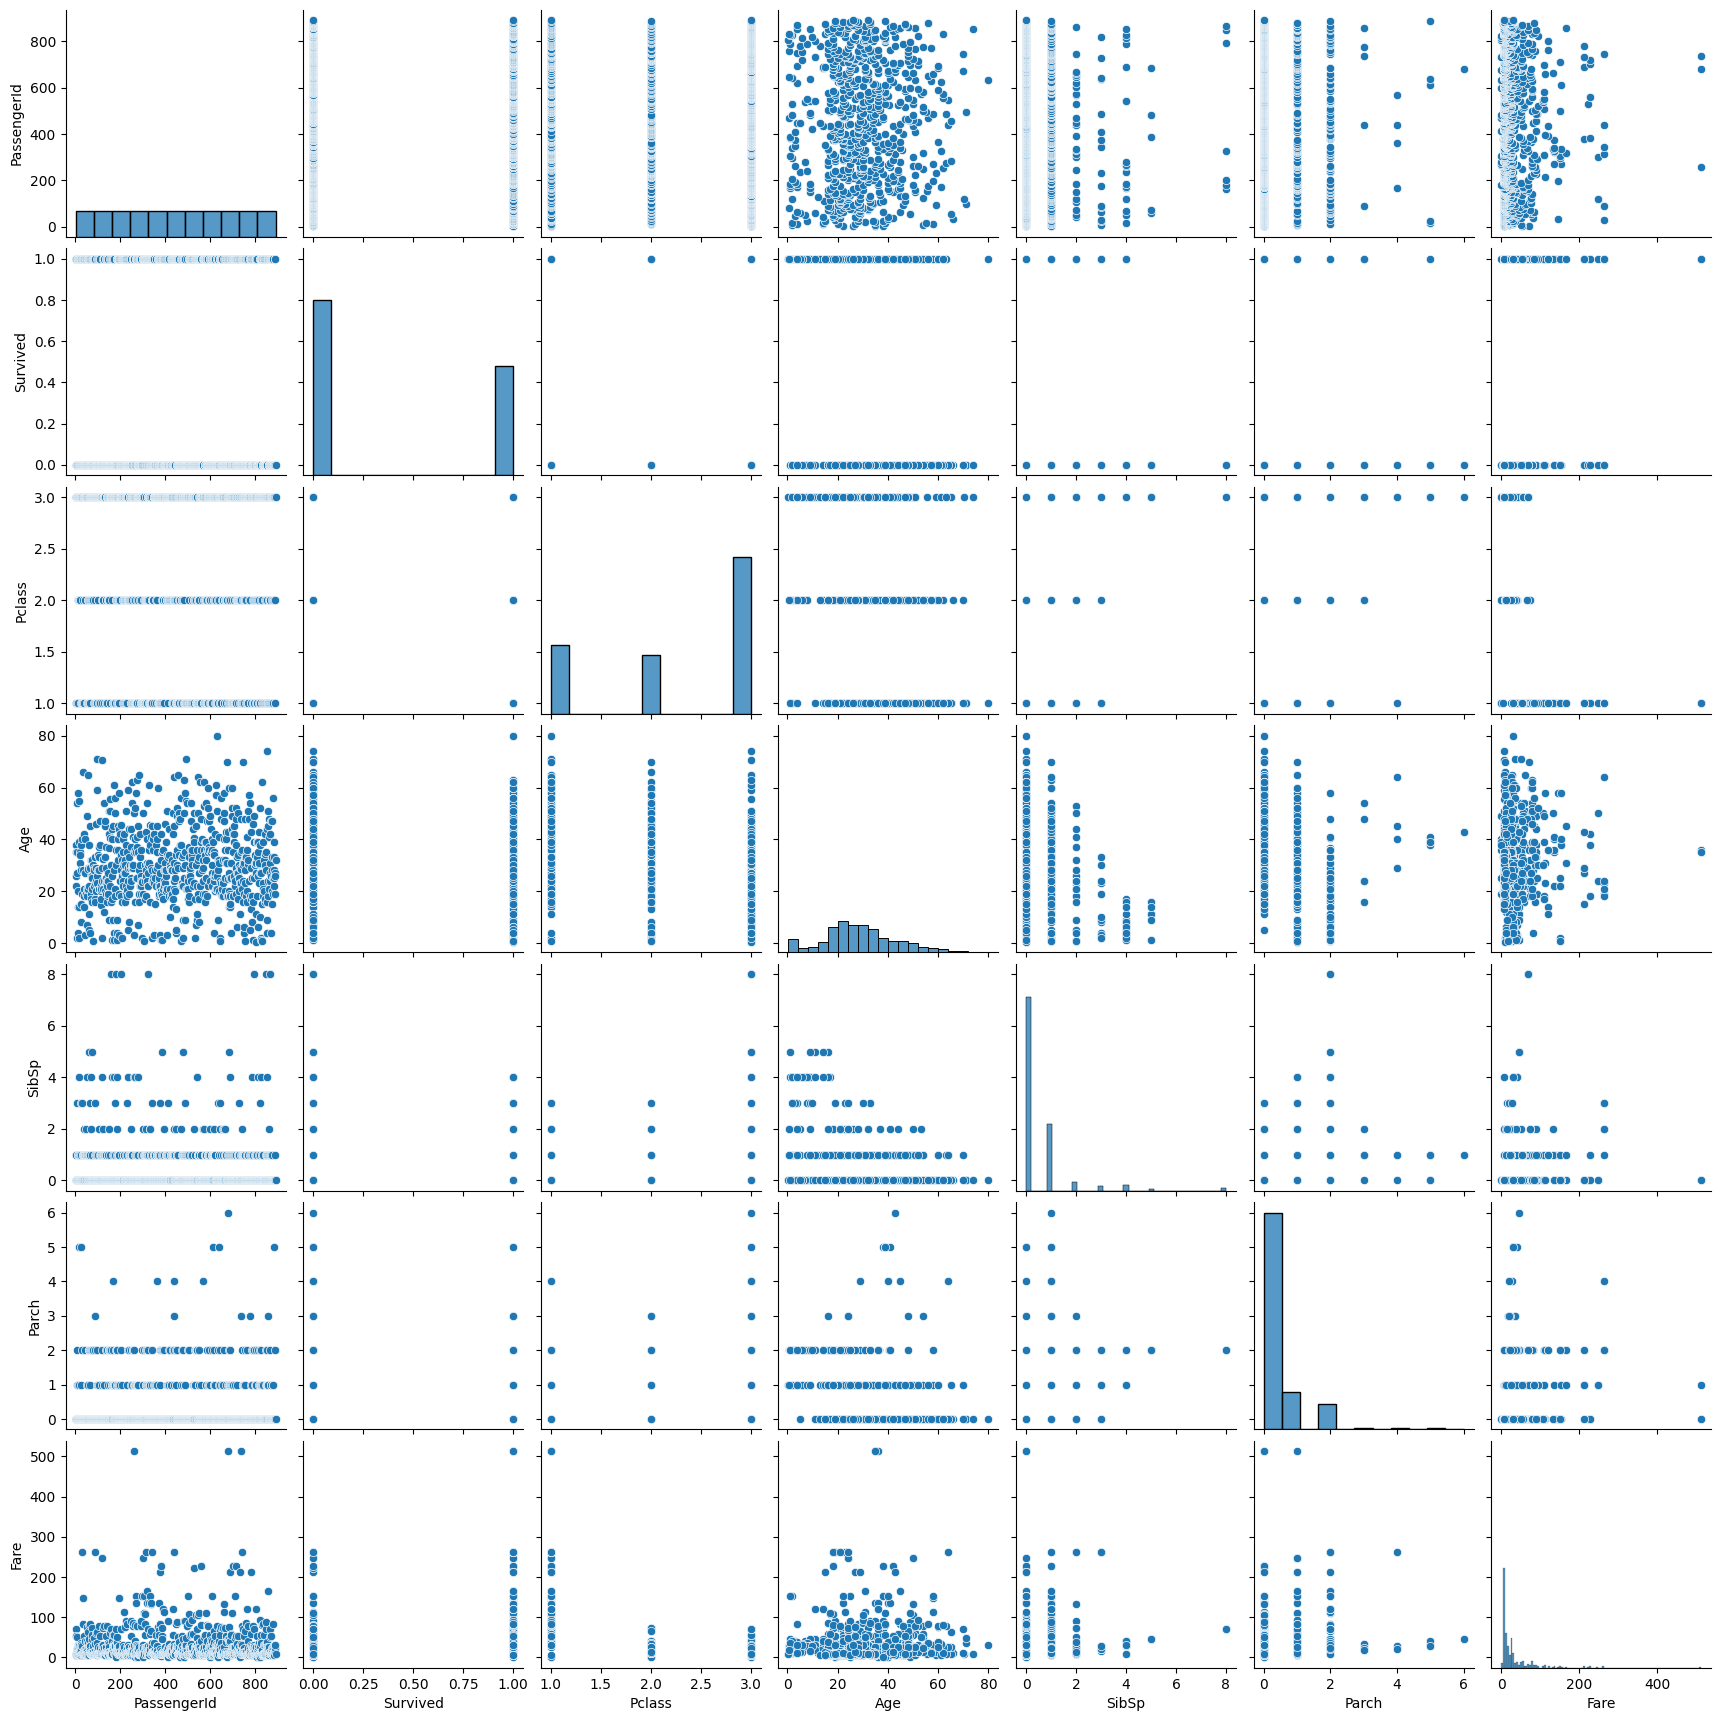

In [ ]:
#Scatter plot com saebron - variação 1
sns.pairplot(titanic)

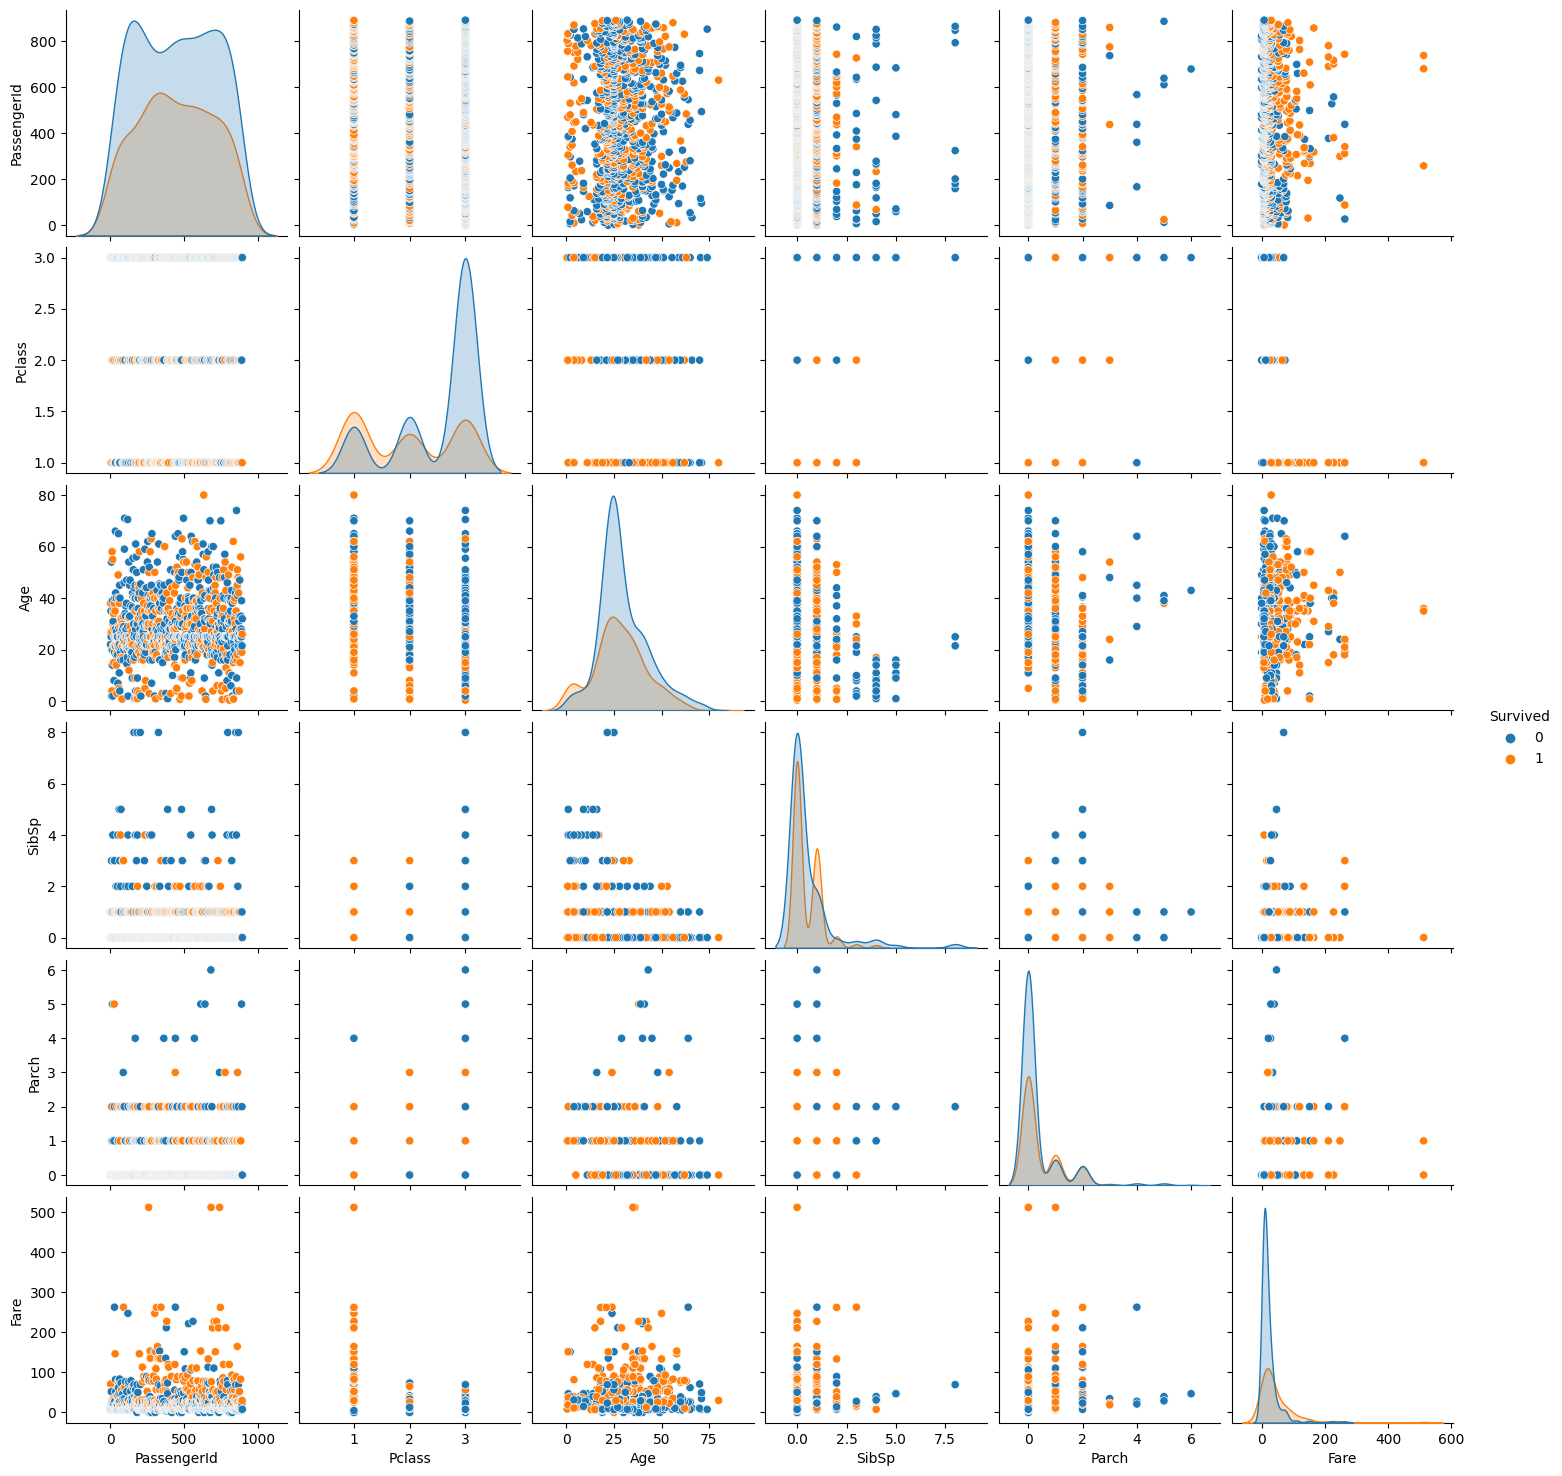

In [ ]:
#Scatter plot com saebron - variação 2
sns.pairplot(titanic, hue = "Survived", height = 2.5);

ANALISE SOBRE OS SOBREVIVENTES DO DESASTRE


0 = AO NUMERO DE PASSAGEIROS QUE NAO SOBREVIVERAM


1 = AO NUMERO DE PASSAGEIROS QUE SOBREVIVERAM

PODEMOS VER QUE HOVE MAIS MORTOS DO QUE SOBREVIVENTES

<Axes: xlabel='Survived', ylabel='count'>

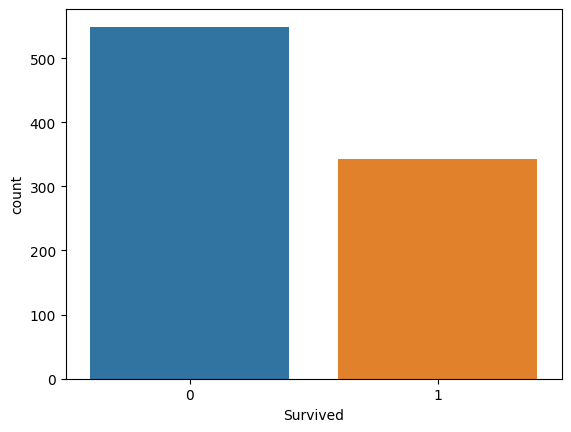

In [ ]:
#analisando de sobreviventes
sns.countplot(data = titanic, x = 'Survived')

PODEMOS VER QUE 3 PASSAGEIROS PAGARAM VALORES FORA DO NORMAL EM SUAS PASSAGENS DE EMBRAQUE, VAMOS FAZER O FILTRO PARA VER OS PASSAGEIROS QUE EFETURAM O PAGAMENTO DESSE VALOR, EFETUEI A PESQUISA SOBRE O VALOR QUE FOI PAGO E REALMENTE ESTA CORRETO, ESSE FOI O VALOR PAGO PELOS 3 PASSAGEIROS

In [39]:
#filtrar esse valor
titanic[titanic.Fare == titanic.Fare.max()]

PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare Embarked  
258  female  35.0      0      0  PC 17755  512.3292        C  
679    male  36.0      0      1  PC 17755  512.3292        C  
737    male  35.0      0      0  PC 17755  512.3292        C

###pandas profiling

In [ ]:
# Instalando o pandas profiling 
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.6/22.6 MB 68.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 111.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 86.6 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=693f79d5646163e1e6982ec3fdac4a302109a125b97f85730a330487b33d71a

In [ ]:
# imports necessários
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
# geração do report
profile = ProfileReport(titanic, title='Pandas Profiling Report', html={'style':{'full_width':False}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

###exportar os arquivos


In [ ]:
# exportação do report
profile.to_file(output_file="Report-titanic.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

###continuações de novos insigts

TypeError: ignored

In [ ]:
descrever as coisas (verno video de limpeza)
colocar o codigo e o doc do colab no github
train teste

In [ ]:
valores e idade, titulo dos sobreviventes,sobreviventes sex,quatidade de sobreviventes, classes q mais sobreviveram